<a href="https://colab.research.google.com/github/Asif123375/Computational-Physics/blob/main/PDE_OF_HYPERBOLIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: MD.ASIF
# Reg: 2017132028

# For this Problem we solve 1D wave equation
# Working Formula For this problem is U(i,j+1) = (1-lamda)* U(i,j) + 0.5* lamda*{U(i-1,j)+U(i+1,j)


In [ ]:
# Import necessary libraries
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline

def fun(i):
  """ This function will calculate the boundary value of u(x,t=0)= sin(pi*x), this condition might be change for some other problems"""
  """ return all the possible value of u for different value of x at range(0->1, step_size = 0.1):"""
  pi = 3.1416
  x = np.sin(pi*i)
  return x
def PDE_Hyperbolic_Equation(h,k,c, limit_of_t, limit_of_x):
  """This Function Solve the numerical solution of PDE of Hyperbolic Equation like One Dimensional Wave Equation"""
  """Later I modify this function for any value of h,k,c"""
  """For the case Simplicity we choose the value of h,k such that lamda=1"""
  """This function Return u,x,t"""

  # For this Problem we solve 1D wave equation
  # Working Formula For this problem is U(i,j+1) = 2*(1-lamda)*U(i,j) + lamda*{U(i-1,j)+U(i+1,j)} -U(i, j-1)----------------(1)
  # Where lamda = k^2*c^2/h^2
  # In our Problem one boundary condition was del(u)/del(t) = 0, it means U(i, j+1) = U(i,j-1) ; Using central difference formula
  # Then From(2) Working formula Should be U(i, j+1) = (1-lamda)*U(i,j) + 0.5*lamda*{U(i-1,j)+U(i+1,j)}---------------------------------(3)
  # Taking value of h,k & c
  lamda = (k**2*c**2/h**2) 
  total_x_val = int((limit_of_x/h)+1)
  total_t_val = int((limit_of_t/k)+1)
  x = np.linspace(0,limit_of_x,total_x_val)
  t = np.linspace(0,limit_of_t,total_t_val)
  # initialize the u as a empty matrix of size (len(x) by len(t)).
  u = np.zeros((len(t), len(x)))

  # fill the value in u which is given as condition by the help of a for loop
  for i in range(len(x)-1):
    u[0,i] = fun(x[i])

  # finaly using reducing working formula calculate all possibe value of u
  for i in range(1, len(t)):
    for j in range(1, len(x)-1):
      u[i,j] = (1-lamda)*u[i-1,j] + 0.5*(u[i-1, j-1] + u[i-1, j+1])
  return u,t,x,lamda


#  Create Result of U as a DataFrame 

In [ ]:
get_U,t,x,lamda = PDE_Hyperbolic_Equation(0.04,0.035,1,5,5)
df = pd.DataFrame(get_U)
df.index = t
columns = dict()
for i in range(len(x)):
  columns[i] ="x=" +str((i*(1/(len(x)-1))))
df = df.rename(columns=columns)
df.head(20) # first 20 value of the DataFrame

,x=0.0,x=0.008,x=0.016,x=0.024,x=0.032,x=0.04,x=0.048,x=0.056,x=0.064,x=0.07200000000000001,x=0.08,x=0.088,x=0.096,x=0.10400000000000001,x=0.112,x=0.12,x=0.128,x=0.136,x=0.14400000000000002,x=0.152,x=0.16,x=0.168,x=0.176,x=0.184,x=0.192,x=0.2,x=0.20800000000000002,x=0.216,x=0.224,x=0.232,x=0.24,x=0.248,x=0.256,x=0.264,x=0.272,x=0.28,x=0.28800000000000003,x=0.296,x=0.304,x=0.312,...,x=0.6880000000000001,x=0.6960000000000001,x=0.704,x=0.712,x=0.72,x=0.728,x=0.736,x=0.744,x=0.752,x=0.76,x=0.768,x=0.776,x=0.784,x=0.792,x=0.8,x=0.808,x=0.8160000000000001,x=0.8240000000000001,x=0.8320000000000001,x=0.84,x=0.848,x=0.856,x=0.864,x=0.872,x=0.88,x=0.888,x=0.896,x=0.904,x=0.912,x=0.92,x=0.928,x=0.936,x=0.9440000000000001,x=0.9520000000000001,x=0.96,x=0.968,x=0.976,x=0.984,x=0.992,x=1.0
0.000000,0.0,0.125334,0.248690,0.368125,0.481755,0.587786,0.684548,0.770515,0.844329,0.904828,0.951057,0.982288,0.998027,0.998026,0.982286,0.951055,0.904825,0.844325,0.770510,0.684543,0.587780,0.481748,0.368119,0.248683,0.125326,-0.000007,-0.125341,-0.248698,-0.368132,-0.481761,-0.587792,-0.684554,-0.770519,-0.844333,-0.904831,-0.951060,-0.982289,-0.998027,-0.998026,-0.982285,...,-0.982292,-0.998028,-0.998025,-0.982282,-0.951048,-0.904816,-0.844313,-0.770496,-0.684527,-0.587763,-0.481729,-0.368098,-0.248662,-0.125304,0.000029,0.125363,0.248719,0.368153,0.481780,0.587810,0.684570,0.770533,0.844345,0.904841,0.951067,0.982293,0.998029,0.998025,0.982281,0.951046,0.904813,0.844310,0.770491,0.684522,0.587757,0.481723,0.368091,0.248655,0.125297,0.0
0.035211,0.0,0.153720,0.305016,0.451502,0.590867,0.720914,0.839592,0.945028,1.035561,1.109762,1.166462,1.204766,1.224070,1.224069,1.204764,1.166459,1.109759,1.035556,0.945022,0.839585,0.720907,0.590859,0.451494,0.305008,0.153711,-0.000009,-0.153729,-0.305025,-0.451510,-0.590875,-0.720921,-0.839598,-0.945034,-1.035566,-1.109766,-1.166465,-1.204768,-1.224070,-1.224069,-1.204763,...,-1.204771,-1.224071,-1.224067,-1.204759,-1.166451,-1.109747,-1.035542,-0.945005,-0.839565,-0.720885,-0.590836,-0.451468,-0.304981,-0.153685,0.000036,0.153756,0.305051,0.451535,0.590899,0.720943,0.839618,0.945051,1.035580,1.109778,1.166473,1.204773,1.224072,1.224067,1.204757,1.166448,1.109743,1.035537,0.944999,0.839559,0.720878,0.590828,0.451460,0.304973,0.153694,0.0
0.070423,0.0,0.188536,0.374099,0.553762,0.724692,0.884194,1.029750,1.159067,1.270105,1.361112,1.430654,1.477633,1.501309,1.501308,1.477631,1.430650,1.361107,1.270099,1.159060,1.029742,0.884185,0.724683,0.553752,0.374089,0.188525,-0.000011,-0.188547,-0.374110,-0.553773,-0.724702,-0.884203,-1.029758,-1.159074,-1.270111,-1.361117,-1.430657,-1.477635,-1.501310,-1.501307,-1.477629,...,-1.477639,-1.501311,-1.501306,-1.477625,-1.430640,-1.361093,-1.270081,-1.159039,-1.029718,-0.884158,-0.724654,-0.553721,-0.374056,-0.188492,0.000044,0.188580,0.374142,0.553804,0.724731,0.884229,1.029783,1.159095,1.270129,1.361131,1.430667,1.477641,1.501312,1.501305,1.477623,1.430637,1.361089,1.270075,1.159032,1.029710,0.884149,0.724644,0.553711,0.374055,0.188508,0.0
0.105634,0.0,0.231238,0.458829,0.679184,0.888828,1.084454,1.262978,1.421584,1.557771,1.669390,1.754682,1.812302,1.841340,1.841339,1.812299,1.754678,1.669384,1.557763,1.421575,1.262968,1.084443,0.888816,0.679171,0.458816,0.231224,-0.000014,-0.231251,-0.458842,-0.679197,-0.888840,-1.084465,-1.262988,-1.421593,-1.557778,-1.669396,-1.754686,-1.812304,-1.841341,-1.841338,-1.812296,...,-1.812309,-1.841342,-1.841336,-1.812291,-1.754665,-1.669367,-1.557741,-1.421549,-1.262939,-1.084410,-0.888780,-0.679134,-0.458776,-0.231184,0.000054,0.231292,0.458881,0.679234,0.888875,1.084498,1.263018,1.421619,1.557800,1.669413,1.754699,1.812312,1.841343,1.841336,1.812289,1.754661,1.669361,1.557734,1.421541,1.262929,1.084399,0.888768,0.679126,0.458779,0.231209,0.0
0.140845,0.0,0.283611,0.562749,0.833012,1.090138,1.330072,1.549030,1.743558,1.910589,2.047490,2.152099,2.222769,2.258384,2.258383,2.222766,2.152094,2.047482,1.910581,1.743547,1.549018,1.330059,1.090124,0.83

# Plot the Graph of U versus Time for different value of X

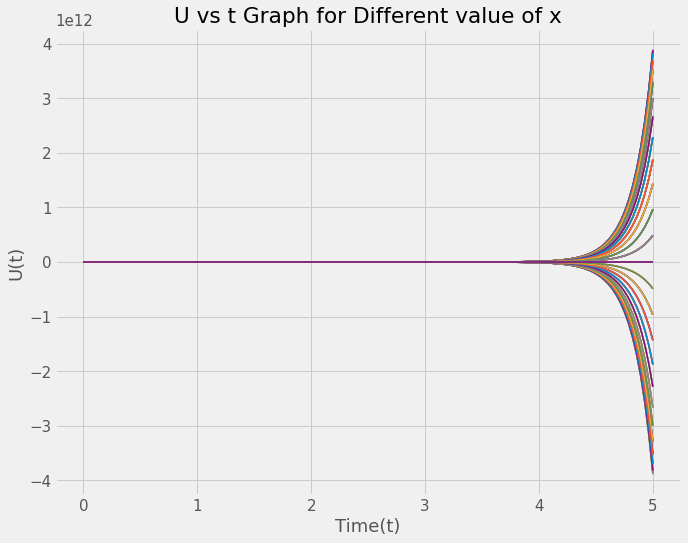

In [ ]:
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['lines.linewidth']=1.5
ax = df.plot(legend = False, figsize = (10,8), grid=True,)
ax.set_title("U vs t Graph for Different value of x")
ax.set_xlabel("Time(t)")
ax.set_ylabel("U(t)");

# Plot the Graph of U versus X for different value of t

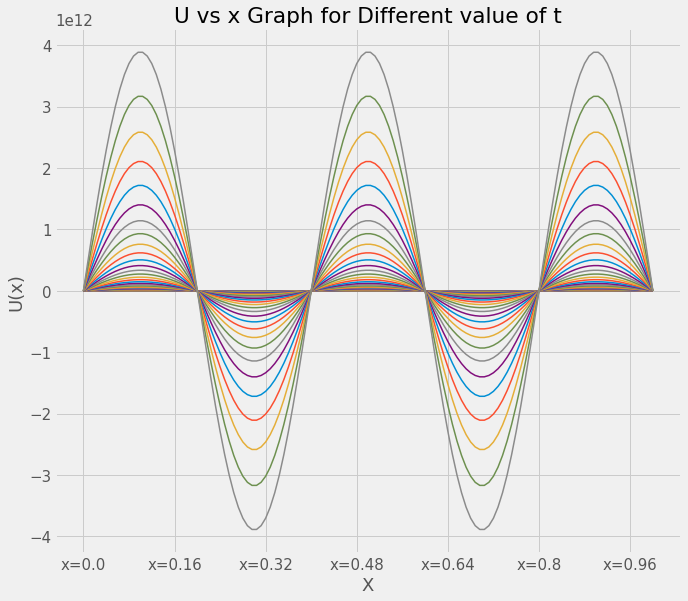

In [ ]:
df1 = df.T.copy()
ax1 = df1.plot(legend = False, figsize = (10,9), grid=True,)
ax1.set_title("U vs x Graph for Different value of t")
ax1.set_xlabel("X")
ax1.set_ylabel("U(x)");
